In [0]:
import tensorflow as tf 
from tensorflow import keras

In [0]:
dataset='drive/My Drive/Beans'

In [0]:
from tensorflow.keras.applications.mobilenet_v2 import  MobileNetV2

In [0]:
pre_trained_model=MobileNetV2(
    input_shape=(160,160,3),
    include_top=False,
    weights='imagenet'
)

9412608/9406464 [==============================] - 0s 0us/step


In [0]:
for layer in pre_trained_model.layers:
  layer.trainable = False
pre_trained_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 161, 161, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 80, 80, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 80, 80, 32)   128         Conv1[0][0]                      
_______________________________________________________________________________

In [0]:
last_layer = pre_trained_model.get_layer('out_relu')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 5, 5, 1280)


In [0]:
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import layers

In [0]:
global_average_layer=layers.GlobalAveragePooling2D()
x=global_average_layer(last_output)

x=layers.Dense(64,activation=tf.nn.leaky_relu)(x)
x=layers.Dropout(0.8)(x)
x=layers.Dense(16,activation=tf.nn.leaky_relu)(x)






x=layers.Dense(3,activation=tf.nn.softmax)(x)
model=Model(pre_trained_model.input,x)

model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1.0/255.0,
                                 
                                 )
train_generator=train_datagen.flow_from_directory(
    'drive/My Drive/Beans/train',
     batch_size=47,
    target_size=(160,160),
    class_mode='categorical',
    
    shuffle=True,
    
    
)

validation_generator = train_datagen.flow_from_directory( 'drive/My Drive/Beans/test',
                                                          batch_size=32,
                                                          class_mode  = 'categorical',
                                                          shuffle=True,
                                                         
                                                          target_size = (160, 160))

Found 1034 images belonging to 3 classes.
Found 128 images belonging to 3 classes.


In [0]:
history=model.fit(train_generator,validation_data=validation_generator,epochs=40,steps_per_epoch=22,validation_steps=4)

Epoch 1/40
22/22 [==============================] - 8s 372ms/step - loss: 1.4427 - accuracy: 0.3288 - val_loss: 0.9993 - val_accuracy: 0.5078
Epoch 2/40
22/22 [==============================] - 8s 343ms/step - loss: 1.2131 - accuracy: 0.4072 - val_loss: 0.9289 - val_accuracy: 0.6250
Epoch 3/40
22/22 [==============================] - 8s 347ms/step - loss: 1.0797 - accuracy: 0.4623 - val_loss: 0.8920 - val_accuracy: 0.7188
Epoch 4/40
22/22 [==============================] - 8s 353ms/step - loss: 0.9900 - accuracy: 0.5087 - val_loss: 0.8115 - val_accuracy: 0.7812
Epoch 5/40
22/22 [==============================] - 8s 351ms/step - loss: 0.9502 - accuracy: 0.5368 - val_loss: 0.7739 - val_accuracy: 0.7578
Epoch 6/40
22/22 [==============================] - 8s 345ms/step - loss: 0.8906 - accuracy: 0.6006 - val_loss: 0.7110 - val_accuracy: 0.8125
Epoch 7/40
22/22 [==============================] - 8s 345ms/step - loss: 0.8295 - accuracy: 0.6219 - val_loss: 0.6507 - val_accuracy: 0.8281
Epoch 

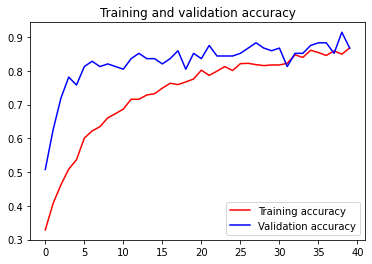

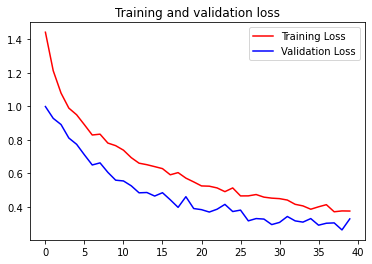

In [0]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
history=model.fit(train_generator,validation_data=validation_generator,epochs=40,steps_per_epoch=22,validation_steps=4)

Epoch 1/40
22/22 [==============================] - 8s 353ms/step - loss: 0.3740 - accuracy: 0.8569 - val_loss: 0.2961 - val_accuracy: 0.8672
Epoch 2/40
22/22 [==============================] - 8s 347ms/step - loss: 0.3714 - accuracy: 0.8733 - val_loss: 0.2540 - val_accuracy: 0.8984
Epoch 3/40
22/22 [==============================] - 8s 349ms/step - loss: 0.3664 - accuracy: 0.8598 - val_loss: 0.2653 - val_accuracy: 0.8984
Epoch 4/40
22/22 [==============================] - 8s 350ms/step - loss: 0.3573 - accuracy: 0.8675 - val_loss: 0.2970 - val_accuracy: 0.8984
Epoch 5/40
22/22 [==============================] - 8s 350ms/step - loss: 0.3585 - accuracy: 0.8665 - val_loss: 0.2832 - val_accuracy: 0.8828
Epoch 6/40
22/22 [==============================] - 8s 348ms/step - loss: 0.3551 - accuracy: 0.8685 - val_loss: 0.2633 - val_accuracy: 0.9062
Epoch 7/40
22/22 [==============================] - 8s 357ms/step - loss: 0.3278 - accuracy: 0.8714 - val_loss: 0.3048 - val_accuracy: 0.8828
Epoch 

In [0]:
model.compile(optimizer = RMSprop(lr=0.001,momentum=0.7,epsilon=1e-6), 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

In [0]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.94):
      print("\nReached 94% accuracy so cancelling training!")
      self.model.stop_training = True

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.000001)

history=model.fit(train_generator,validation_data=validation_generator,epochs=120,steps_per_epoch=22,validation_steps=4,callbacks=[reduce_lr,myCallback()])

Epoch 1/120
22/22 [==============================] - 8s 377ms/step - loss: 0.2026 - accuracy: 0.9197 - val_loss: 0.3429 - val_accuracy: 0.8828 - lr: 0.0010
Epoch 2/120
22/22 [==============================] - 8s 346ms/step - loss: 0.2294 - accuracy: 0.9294 - val_loss: 0.3567 - val_accuracy: 0.9062 - lr: 0.0010
Epoch 3/120
22/22 [==============================] - 8s 344ms/step - loss: 0.1801 - accuracy: 0.9342 - val_loss: 0.5345 - val_accuracy: 0.8516 - lr: 0.0010
Epoch 4/120
22/22 [==============================] - 8s 355ms/step - loss: 0.1873 - accuracy: 0.9342 - val_loss: 0.3708 - val_accuracy: 0.8906 - lr: 0.0010
Epoch 5/120
22/22 [==============================] - 8s 352ms/step - loss: 0.1748 - accuracy: 0.9371 - val_loss: 0.3736 - val_accuracy: 0.8906 - lr: 0.0010
Epoch 6/120
22/22 [==============================] - 8s 350ms/step - loss: 0.1553 - accuracy: 0.9420 - val_loss: 0.3872 - val_accuracy: 0.8984 - lr: 0.0010
Epoch 7/120
22/22 [==============================] - 8s 347ms/st

In [0]:
model.save('drive/My Drive/Beans Model/version1')

INFO:tensorflow:Assets written to: drive/My Drive/Beans Model/version1/assets


In [0]:
import tensorflow as tf 

In [0]:
model=tf.keras.models.load_model('drive/My Drive/Beans Model/version1')

In [0]:
import matplotlib.pyplot as plt
import matplotlib

Saving 1dff6052-bc36-4b42-ae08-16ca1230cdf1.jfif to 1dff6052-bc36-4b42-ae08-16ca1230cdf1 (9).jfif
Saving 2f2898ce-52c4-423d-8e04-883bdb39b4e2.jfif to 2f2898ce-52c4-423d-8e04-883bdb39b4e2 (9).jfif
Saving 3fb1ceb5-4063-4eb4-ac76-b1311336eda8.jfif to 3fb1ceb5-4063-4eb4-ac76-b1311336eda8 (11).jfif
Saving 5c002c7c-2c42-4fc5-ab55-d2bc4752b665.jfif to 5c002c7c-2c42-4fc5-ab55-d2bc4752b665 (9).jfif
Saving 7b38014c-436c-4a51-b580-63a12552b70d.jfif to 7b38014c-436c-4a51-b580-63a12552b70d (9).jfif
Saving 32cc2dbe-83c4-4bfa-8a46-da2315f1e526.jfif to 32cc2dbe-83c4-4bfa-8a46-da2315f1e526 (9).jfif
Saving 72cb655c-7c18-43d8-8451-7b61559f4178.jfif to 72cb655c-7c18-43d8-8451-7b61559f4178 (18).jfif
Saving 88173b8a-be8a-4753-9ef9-a7777d89e250.jfif to 88173b8a-be8a-4753-9ef9-a7777d89e250 (2).jfif
Saving bf472985-7e43-4a33-a03f-9ea98f15b347.jfif to bf472985-7e43-4a33-a03f-9ea98f15b347 (11).jfif


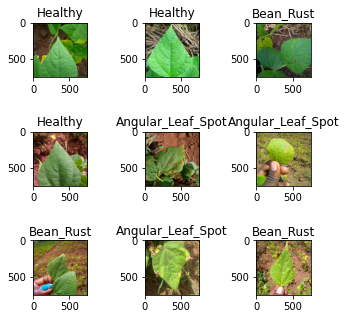

In [28]:
import tensorflow as tf

import numpy as np

from google.colab import files
from keras.preprocessing import image
dictionary={
    0:'Angular_Leaf_Spot',
    1:'Bean_Rust',
    2:'Healthy'
}
uploaded=files.upload()
i=0
j=0
figs,axs=plt.subplots(3,3)
figs.set_size_inches(5.0,5.0)
for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(160,160))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])/255.0
  
  classes = model.predict(images, batch_size=10)
  ""
  result=dictionary[np.argmax(classes[0])]

  img_1=image.load_img(path, target_size=(750,750))
  axs[i,j].imshow(img_1)
  axs[i,j].set_title(result)
  figs.subplots_adjust(wspace=1.0,hspace=1.0)
  if (j%2==0 and j!=0):
    i=i+1
    j=0
  else:

    j=j+1